In [25]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
num_classes = 10
img_size = 28 # mnist size = 28*28

In [27]:
def load_data():
	# load mnist data
	(x_train, y_train), (x_test, y_test) = mnist.load_data()

	# preprocess data, let pixel between 0~1
	x_train = x_train.reshape((x_train.shape[0],28,28,1))
	x_train = x_train.astype('float32') / 255.

	x_test = x_test.reshape((x_test.shape[0],28,28,1))
	x_test = x_test.astype('float32') / 255.

	y_train = np_utils.to_categorical(y_train, num_classes)
	y_test = np_utils.to_categorical(y_test, num_classes)

	return x_train, y_train, x_test, y_test

In [ ]:
if __name__ == '__main__':
    for j in range(3):
        x_train, y_train, x_test, y_test = load_data()
        for i in range(len(y_train)-30000*j):
            y_train[i] = np.eye(10)[np.random.choice(10,1)][0]
        # for i in range(len(y_test)):
        # 	y_test[i] = np.eye(10)[np.random.choice(10,1)][0]

        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(10, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
        model.summary()
        history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.1, shuffle = False)
        historys.append(history)
        plt.plot(historys[j].history['acc'])
        plt.plot(historys[j].history['val_acc'],"--")
        plt.legend(['train100%', 'test100%','train50%','test50%','train0%','test0%'], loc='upper left')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                54090     
_________________________________________________________________
dropout_26 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                110       
Total para

60000/60000 [==============================] - 64s 1ms/step

Train Acc: 0.10075
10000/10000 [==============================] - 10s 991us/step

Test Acc: 0.0958


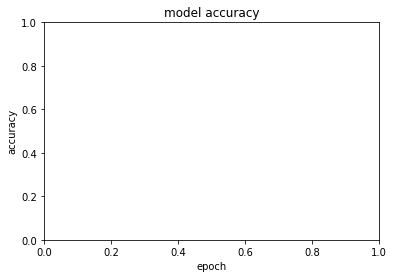

In [24]:

    # output score
score = model.evaluate(x_train,y_train)
print('\nTrain Acc:', score[1])
score = model.evaluate(x_test,y_test)
print('\nTest Acc:', score[1])



# plt.plot(historys[i].history['acc'])
# plt.plot(historys[i].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()